<a href="https://colab.research.google.com/github/Ekawaka/PYTHON-DATA-ANALYSIS/blob/main/pandascapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.image as mping

In [2]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [3]:
data = pd.read_csv('loan_data.csv')

In [ ]:
print(data.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [ ]:
data.shape[0]

9578

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
print(data.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

In [ ]:
print(data.describe())

          int.rate  installment  log.annual.inc          dti         fico  \
count  9578.000000  9578.000000     9578.000000  9578.000000  9578.000000   
mean      0.122640   319.089413       10.932117    12.606679   710.846314   
std       0.026847   207.071301        0.614813     6.883970    37.970537   
min       0.060000    15.670000        7.547502     0.000000   612.000000   
25%       0.103900   163.770000       10.558414     7.212500   682.000000   
50%       0.122100   268.950000       10.928884    12.665000   707.000000   
75%       0.140700   432.762500       11.291293    17.950000   737.000000   
max       0.216400   940.140000       14.528354    29.960000   827.000000   

       days.with.cr.line     revol.bal   revol.util  inq.last.6mths  \
count        9578.000000  9.578000e+03  9578.000000     9578.000000   
mean         4560.767197  1.691396e+04    46.799236        1.577469   
std          2496.930377  3.375619e+04    29.014417        2.200245   
min           178.9583

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values)

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [ ]:
# Check for duplicate rows in the dataset
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

print("Number of duplicate rows:", num_duplicate_rows)



Number of duplicate rows: 0


In [ ]:
# Check for inconsistencies or errors in data types

# Check data types of each column
data_types = data.dtypes

print("Data types of each column:")
print(data_types)

Data types of each column:
credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object


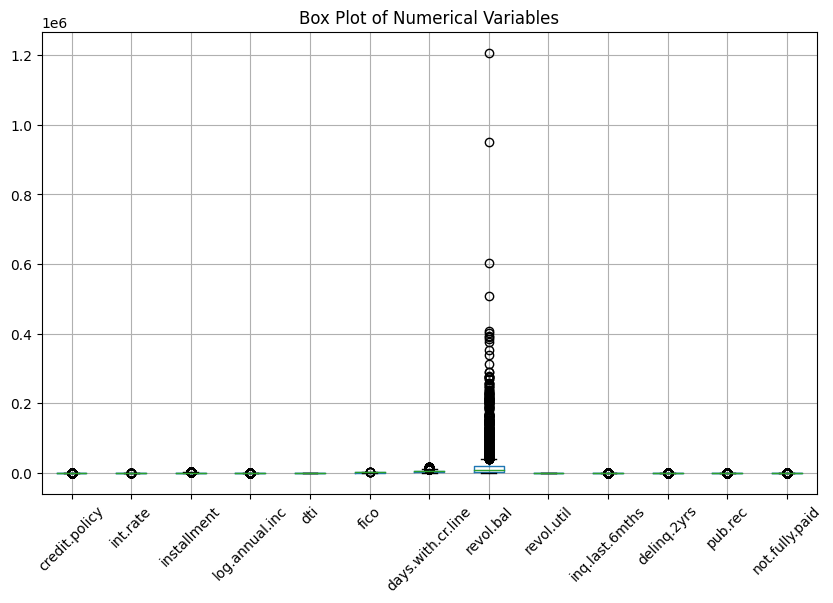

In [ ]:
# Check for outliers

# Plot box plots for numerical variables
data.boxplot(figsize=(10, 6))
plt.title("Box Plot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [4]:
# Credit policy
# Find the distribution of borrowers based on whether they meet the credit underwriting criteria of LendingClub.com (1) or not (0).

borrowers_distribution = data['credit.policy'].value_counts()

print(borrowers_distribution)

credit.policy
1    7710
0    1868
Name: count, dtype: int64


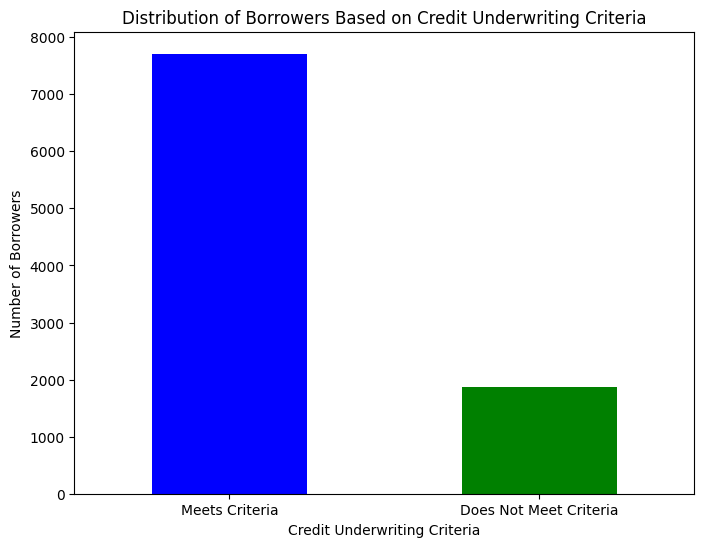

In [6]:
# Plot the distribution
plt.figure(figsize=(8, 6))
borrowers_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Borrowers Based on Credit Underwriting Criteria')
plt.xlabel('Credit Underwriting Criteria')
plt.ylabel('Number of Borrowers')
plt.xticks(ticks=[0, 1], labels=['Meets Criteria', 'Does Not Meet Criteria'], rotation=0)
plt.savefig('cap1.png')
plt.show()

In [ ]:
print(data.head(20))

    credit.policy             purpose  int.rate  installment  log.annual.inc  \
0               1  debt_consolidation    0.1189       829.10       11.350407   
1               1         credit_card    0.1071       228.22       11.082143   
2               1  debt_consolidation    0.1357       366.86       10.373491   
3               1  debt_consolidation    0.1008       162.34       11.350407   
4               1         credit_card    0.1426       102.92       11.299732   
5               1         credit_card    0.0788       125.13       11.904968   
6               1  debt_consolidation    0.1496       194.02       10.714418   
7               1           all_other    0.1114       131.22       11.002100   
8               1    home_improvement    0.1134        87.19       11.407565   
9               1  debt_consolidation    0.1221        84.12       10.203592   
10              1  debt_consolidation    0.1347       360.43       10.434116   
11              1  debt_consolidation   

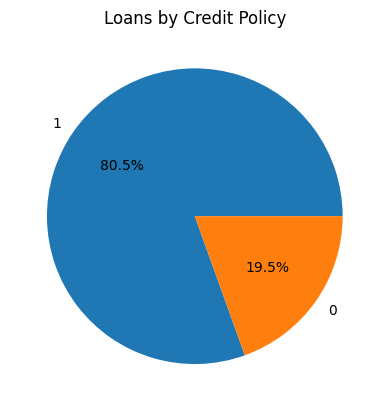

In [9]:
# Loans by credit policy

data['credit.policy'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loans by Credit Policy')
plt.ylabel('')
plt.savefig('cap2.png')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# •	Analyze the impact of meeting the credit policy on loan approval rates and repayment behavior.

# Create loan_status column using lambda function

data['loan_status'] = data['not.fully.paid'].apply(lambda x: 'Fully Paid' if x == 1 else 'Not Fully Paid')
print(data)




      credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000

Approval Rates:
credit.policy
0    Not Fully PaidFully PaidNot Fully PaidFully Pa...
1    Not Fully PaidNot Fully PaidNot Fully PaidNot ...
Name: loan_status, dtype: object

Repayment Behavior:
credit.policy  loan_status   
0              Not Fully Paid    0.722163
               Fully Paid        0.277837
1              Not Fully Paid    0.868482
               Fully Paid        0.131518
Name: proportion, dtype: float64


<Figure size 1000x600 with 0 Axes>

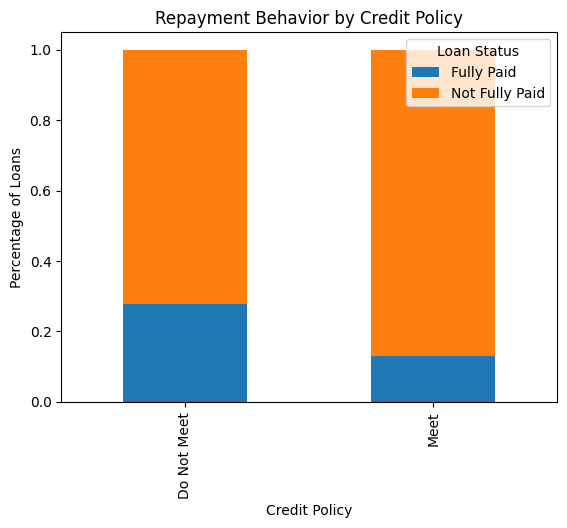

In [ ]:
# Approval rates
approval_rates = data.groupby('credit.policy')['loan_status'].sum()
print("Approval Rates:")
print(approval_rates)

# Repayment behavior
repayment_behavior = data.groupby('credit.policy')['loan_status'].value_counts(normalize=True)
print("\nRepayment Behavior:")
print(repayment_behavior)

# Visualize repayment behavior
plt.figure(figsize=(10, 6))
repayment_behavior.unstack().plot(kind='bar', stacked=True)
plt.title('Repayment Behavior by Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Percentage of Loans')
plt.xticks(ticks=[0, 1], labels=['Do Not Meet', 'Meet'])
plt.legend(title='Loan Status')
plt.show()

In [ ]:
# Purpose:
# Examine the most common purposes of loans among borrowers

common_purposes = data['purpose'].value_counts()

print(common_purposes)

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64


<ipython-input-22-be42e9ed795a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_purposes.index, y=common_purposes.values, palette=colors)


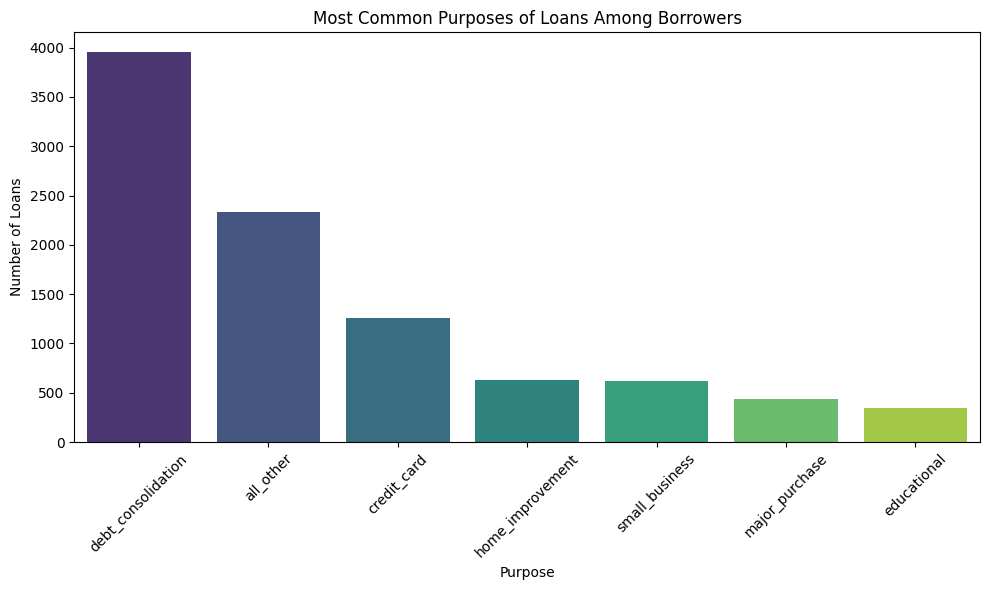

In [ ]:
# Create a bar plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('viridis', len(common_purposes))
sns.barplot(x=common_purposes.index, y=common_purposes.values, palette=colors)
plt.title('Most Common Purposes of Loans Among Borrowers')
plt.xlabel('Purpose')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Assess the default rates and repayment behavior associated with different loan purposes.

# Group the data by loan purpose and calculate default rates
default_rates = data.groupby('purpose')['not.fully.paid'].mean()

print(default_rates)

purpose
all_other             0.166023
credit_card           0.115689
debt_consolidation    0.152388
educational           0.201166
home_improvement      0.170111
major_purchase        0.112128
small_business        0.277868
Name: not.fully.paid, dtype: float64


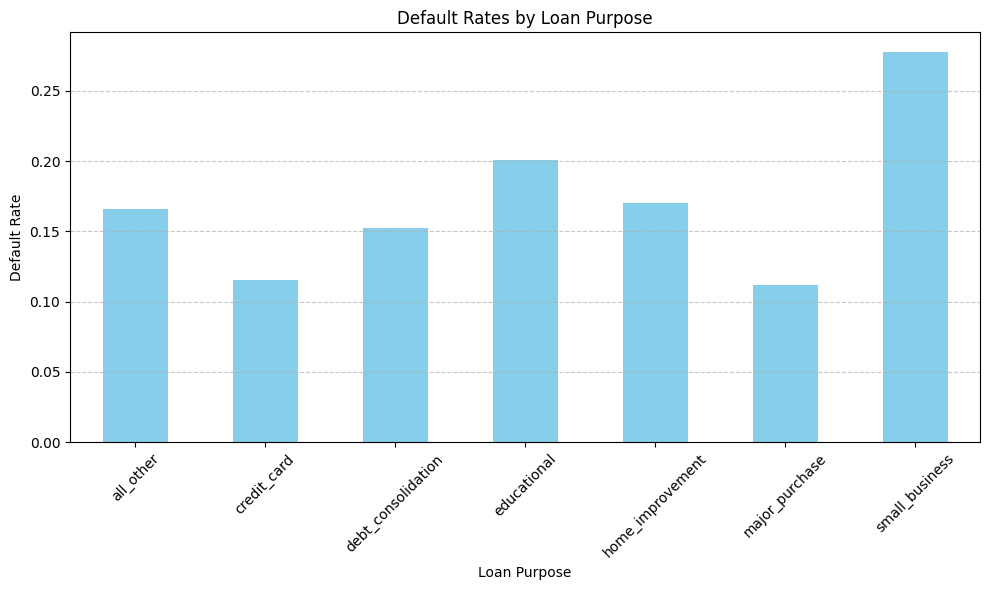

In [ ]:
#Visualize the default rates for different loan purposes.

# Plot the default rates
plt.figure(figsize=(10, 6))
default_rates.plot(kind='bar', color='skyblue')
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Assess the default rates and repayment behavior associated with different loan purposes.



In [ ]:
# 3. Interest Rate (int.rate):
# Calculate summary statistics (mean, median, standard deviation) of interest rates to understand the range and distribution.

# Calculate mean, median, and standard deviation of interest rates
interest_mean = data['int.rate'].mean()
interest_median = data['int.rate'].median()
interest_std = data['int.rate'].std()

print("Mean Interest Rate:", interest_mean)
print("Median Interest Rate:", interest_median)
print("Standard Deviation of Interest Rate:", interest_std)

Mean Interest Rate: 0.12264006055543955
Median Interest Rate: 0.1221
Standard Deviation of Interest Rate: 0.026846987213382245


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
 14  loan_status        9578 non-null   object 
dtypes: float64(6), int64(7), object(2)
memory usage: 1.1+ MB


In [ ]:
# Investigate the relationship between interest rates and borrower characteristics (e.g., credit score, income).

# Extract relevant columns from the dataset
interest_rates = data['int.rate']
credit_score = data['fico']
income = data['log.annual.inc']


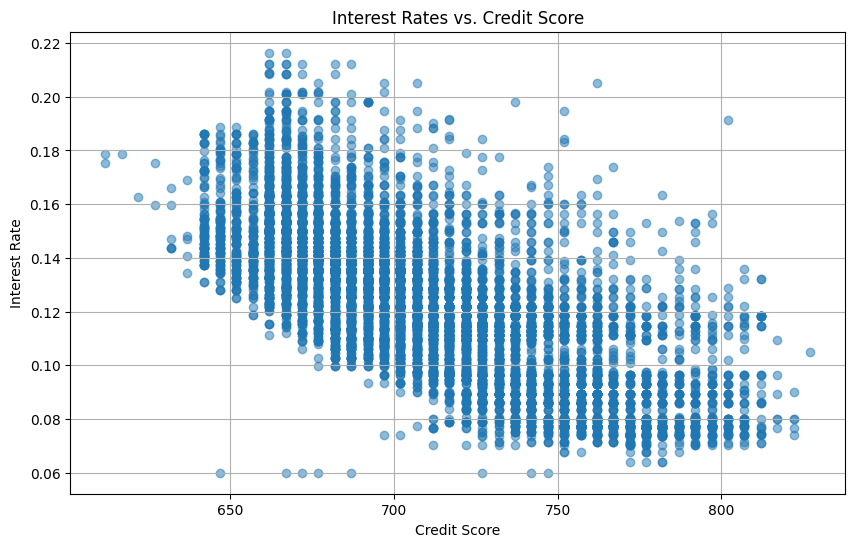

In [ ]:
# Create scatter plot for interest rates vs. credit score
plt.figure(figsize=(10, 6))
plt.scatter(credit_score, interest_rates, alpha=0.5)
plt.title('Interest Rates vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()



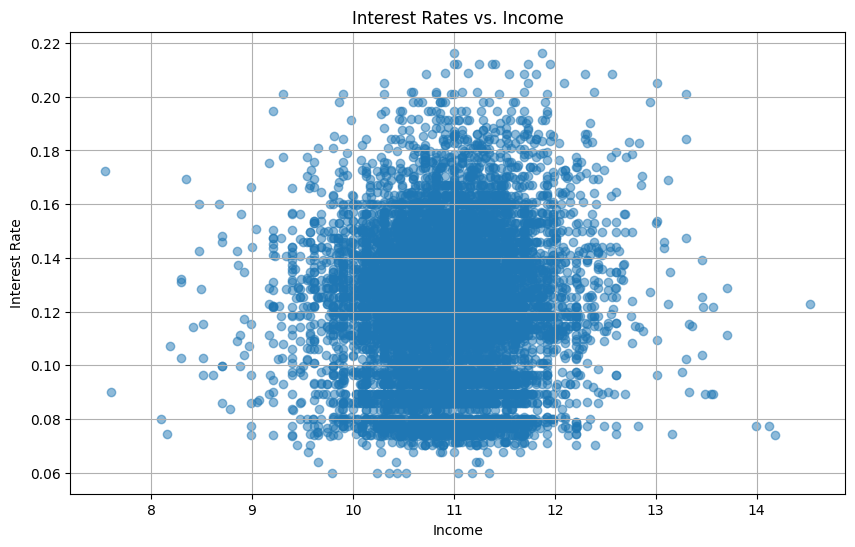

In [ ]:
# Create scatter plot for interest rates vs. income
plt.figure(figsize=(10, 6))
plt.scatter(income, interest_rates, alpha=0.5)
plt.title('Interest Rates vs. Income')
plt.xlabel('Income')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

In [ ]:
# 4.Installment
# Analyze the distribution of monthly installments owed by borrowers and their impact on debt repayment

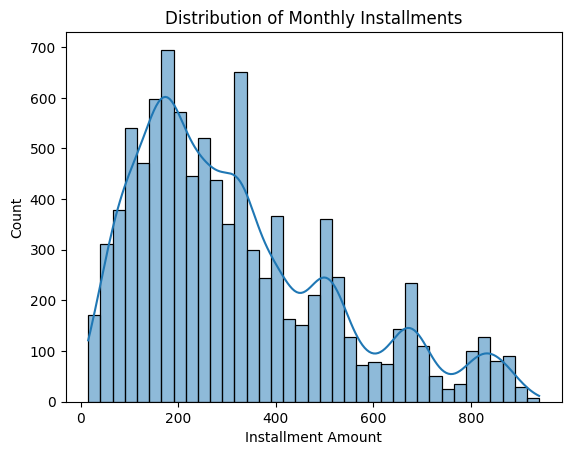

In [ ]:
# Visualize the Distribution of Monthly Installments:

sns.histplot(data['installment'], kde=True)
plt.title('Distribution of Monthly Installments')
plt.xlabel('Installment Amount')
plt.ylabel('Count')
plt.show()

In [ ]:
print(data.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

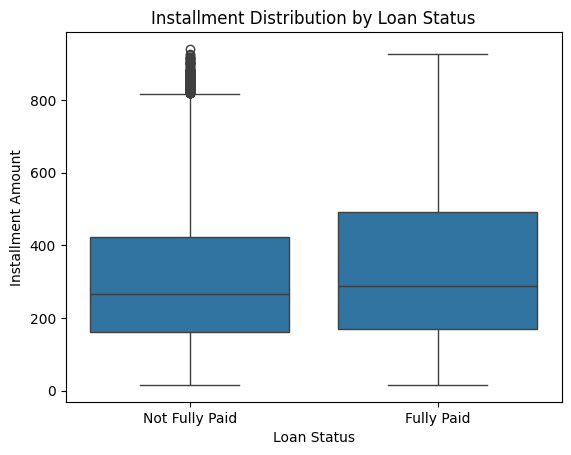

In [ ]:
# Analyze Impact on Debt Repayment:

sns.boxplot(x='loan_status', y='installment', data=data)
plt.title('Installment Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Installment Amount')
plt.show()

In [ ]:
# Correlation Analysis


In [ ]:
# Find numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [ ]:
correlation_matrix = data[numerical_columns].corr()
print(correlation_matrix)

                   credit.policy  int.rate  installment  log.annual.inc  \
credit.policy           1.000000 -0.294089     0.058770        0.034906   
int.rate               -0.294089  1.000000     0.276140        0.056383   
installment             0.058770  0.276140     1.000000        0.448102   
log.annual.inc          0.034906  0.056383     0.448102        1.000000   
dti                    -0.090901  0.220006     0.050202       -0.054065   
fico                    0.348319 -0.714821     0.086039        0.114576   
days.with.cr.line       0.099026 -0.124022     0.183297        0.336896   
revol.bal              -0.187518  0.092527     0.233625        0.372140   
revol.util             -0.104095  0.464837     0.081356        0.054881   
inq.last.6mths         -0.535511  0.202780    -0.010419        0.029171   
delinq.2yrs            -0.076318  0.156079    -0.004368        0.029203   
pub.rec                -0.054243  0.098162    -0.032760        0.016506   
not.fully.paid         -0

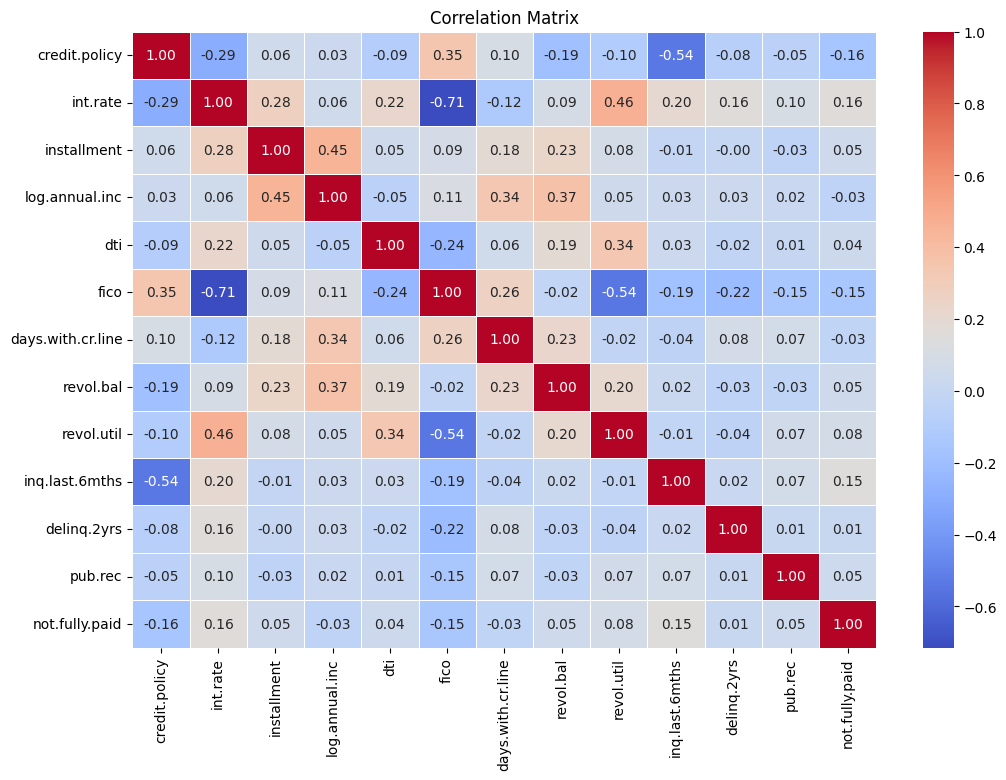

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#	Examine trends in loan amounts and installments over time

In [ ]:
print(data.head())

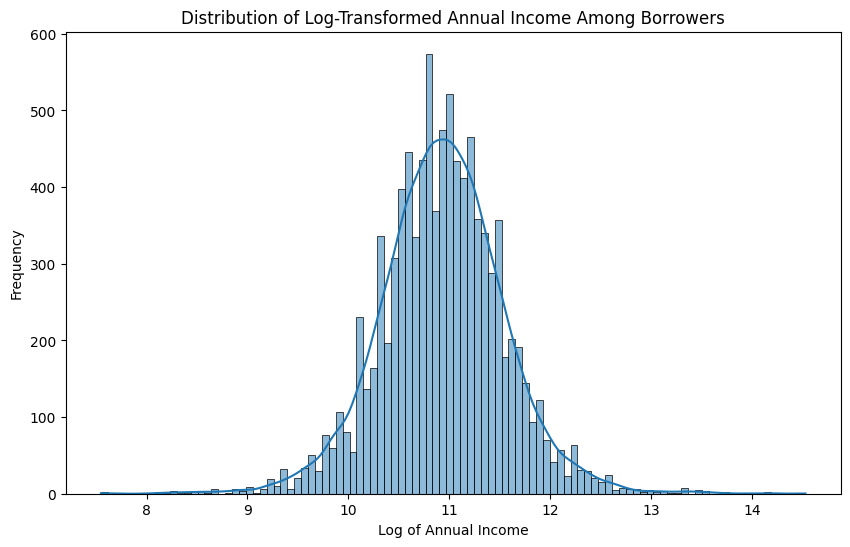

In [ ]:
# 5.	Log Annual Income (log.annual.inc):
# Explore the distribution of self-reported annual income among borrowers after taking the natural logarithm

# Ensure 'log.annual.inc' column contains the natural logarithm of annual income
# If the 'log.annual.inc' column doesn't exist, create it using the 'annual_inc' column (if present)
if 'log.annual.inc' not in data.columns and 'annual_inc' in data.columns:
    data['log.annual.inc'] = data['annual_inc'].apply(lambda x: np.log(x))

# Explore the distribution of the log-transformed annual income
plt.figure(figsize=(10, 6))
sns.histplot(data['log.annual.inc'], kde=True)
plt.title("Distribution of Log-Transformed Annual Income Among Borrowers")
plt.xlabel("Log of Annual Income")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Assess the relationship between income levels and loan default rates.

# Define income levels based on the natural logarithm of annual income
data['income_bracket'] = pd.qcut(data['log.annual.inc'], q=4, labels=['Low', 'Lower-Middle', 'Upper-Middle', 'High'])

# Calculate the default rate for each income bracket
default_rates = data.groupby('income_bracket')['not.fully.paid'].mean()

# Display the default rates for each income bracket
print(default_rates)

income_bracket
Low             0.185571
Lower-Middle    0.156838
Upper-Middle    0.148287
High            0.149478
Name: not.fully.paid, dtype: float64


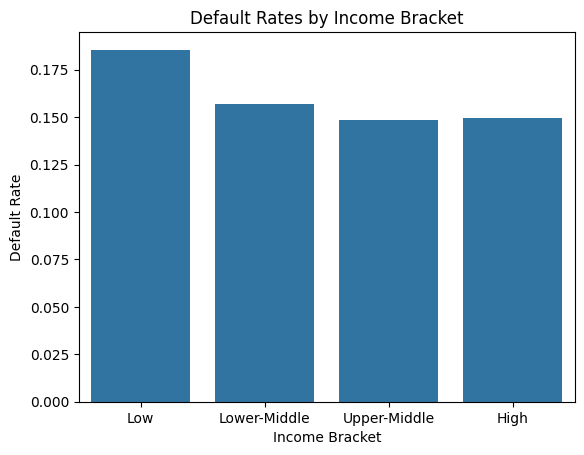

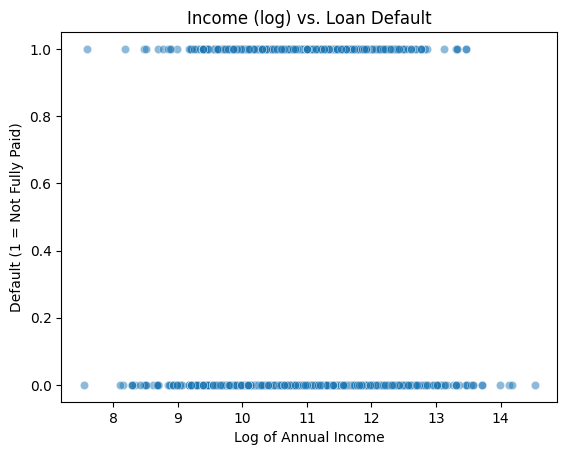

Correlation between Log of Annual Income and Default:
                log.annual.inc  not.fully.paid
log.annual.inc        1.000000       -0.033439
not.fully.paid       -0.033439        1.000000


In [ ]:
# Visualize the default rates
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.title("Default Rates by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Default Rate")
plt.show()

# Scatter plot to explore relationship between income and default
sns.scatterplot(x='log.annual.inc', y='not.fully.paid', data=data, alpha=0.5)
plt.title("Income (log) vs. Loan Default")
plt.xlabel("Log of Annual Income")
plt.ylabel("Default (1 = Not Fully Paid)")
plt.show()

# Correlation between income and loan default
correlation = data[['log.annual.inc', 'not.fully.paid']].corr()
print("Correlation between Log of Annual Income and Default:")
print(correlation)

In [ ]:
# 6.	Debt-to-Income Ratio (dti):


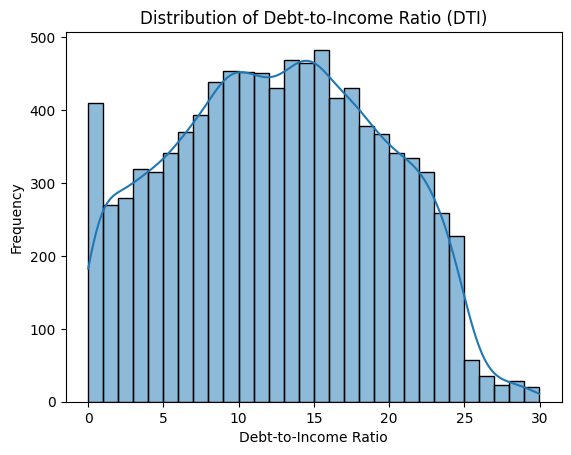

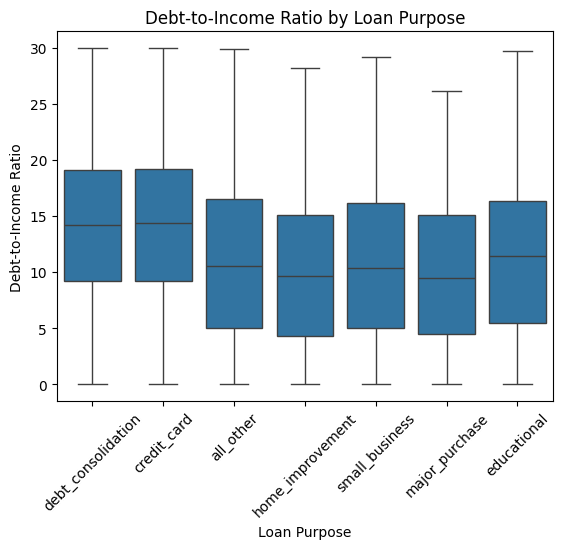

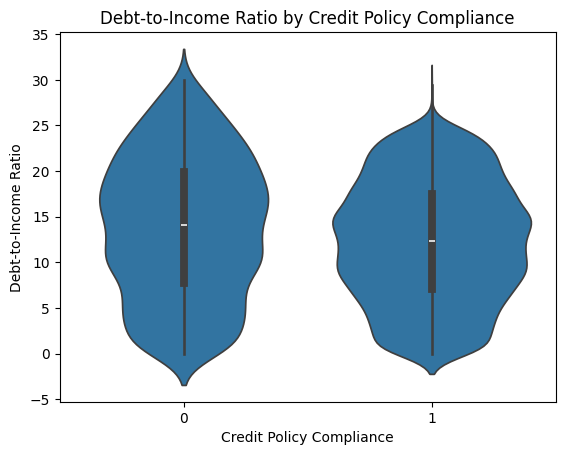

In [ ]:
#	Calculate the debt-to-income ratio for borrowers and analyze its distribution.
# Analyze the distribution of the debt-to-income ratio (DTI)
sns.histplot(data['dti'], kde=True, bins=30)
plt.title("Distribution of Debt-to-Income Ratio (DTI)")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Frequency")
plt.show()

# Examine DTI across different loan purposes
sns.boxplot(x='purpose', y='dti', data=data)
plt.title("Debt-to-Income Ratio by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Debt-to-Income Ratio")
plt.xticks(rotation=45)
plt.show()

# Analyze DTI for borrowers who meet credit policy vs. those who don't
sns.violinplot(x='credit.policy', y='dti', data=data)
plt.title("Debt-to-Income Ratio by Credit Policy Compliance")
plt.xlabel("Credit Policy Compliance")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

Correlation between DTI and loan default rates: 0.03736152382778254


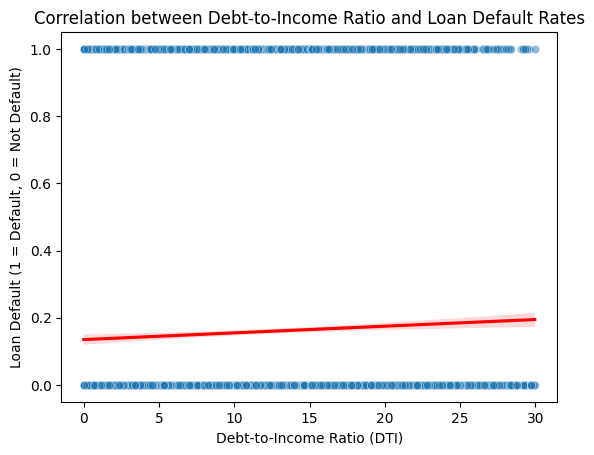

In [ ]:
# •	Investigate the correlation between dti ratios and loan default rates.

# Calculate the correlation coefficient between DTI and loan default rates
correlation = data['dti'].corr(data['not.fully.paid'])
print("Correlation between DTI and loan default rates:", correlation)

# Create a scatter plot to visualize the relationship between DTI and loan default rates
sns.scatterplot(x='dti', y='not.fully.paid', data=data, alpha=0.5)
sns.regplot(x='dti', y='not.fully.paid', data=data, scatter=False, color='red')  # Add a trend line
plt.title("Correlation between Debt-to-Income Ratio and Loan Default Rates")
plt.xlabel("Debt-to-Income Ratio (DTI)")
plt.ylabel("Loan Default (1 = Default, 0 = Not Default)")
plt.show()

In [ ]:
# 7.	FICO Credit Score (fico):

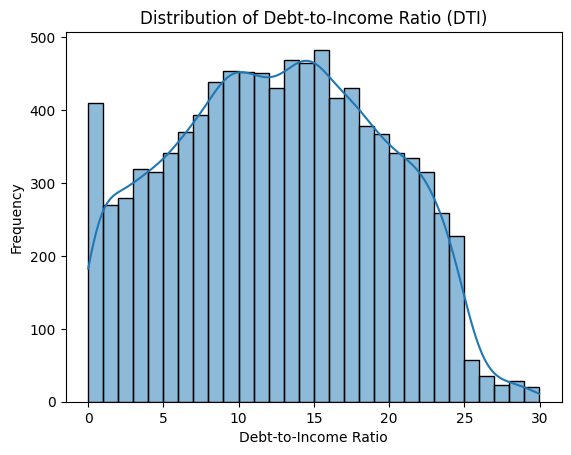

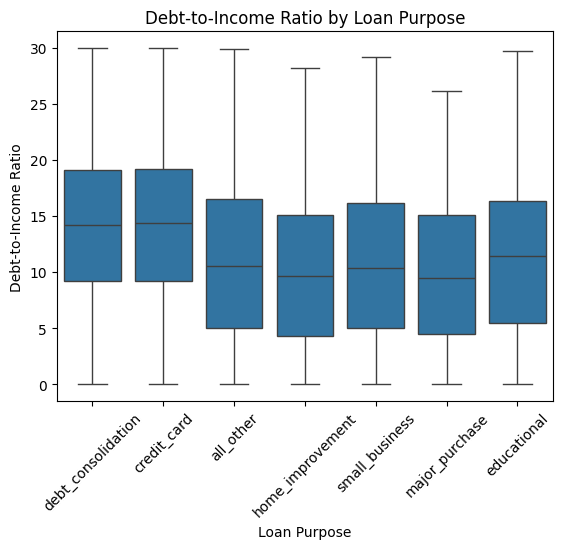

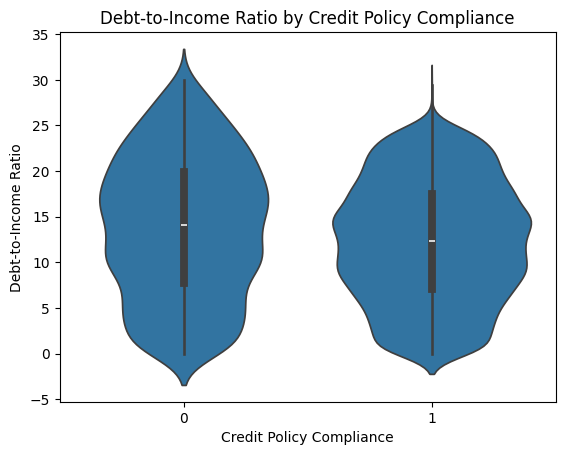

In [ ]:
# Examine the distribution of FICO credit scores among borrowers.

# Analyze the distribution of the debt-to-income ratio (DTI)
sns.histplot(data['dti'], kde=True, bins=30)
plt.title("Distribution of Debt-to-Income Ratio (DTI)")
plt.xlabel("Debt-to-Income Ratio")
plt.ylabel("Frequency")
plt.show()

# Examine DTI across different loan purposes
sns.boxplot(x='purpose', y='dti', data=data)
plt.title("Debt-to-Income Ratio by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Debt-to-Income Ratio")
plt.xticks(rotation=45)
plt.show()

# Analyze DTI for borrowers who meet credit policy vs. those who don't
sns.violinplot(x='credit.policy', y='dti', data=data)
plt.title("Debt-to-Income Ratio by Credit Policy Compliance")
plt.xlabel("Credit Policy Compliance")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

In [ ]:
data.head()

NameError: name 'data' is not defined

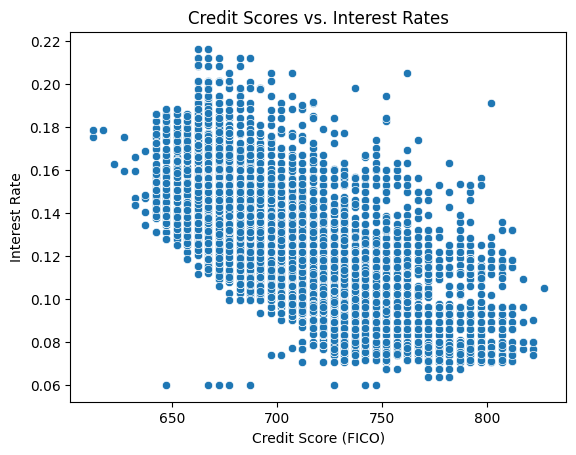

In [ ]:
# Analyze the relationship between credit scores and loan approval rates or interest rates.

# Step 1: Check for null values and handle them (example: drop rows with missing FICO scores)
data.dropna(subset=['fico', 'int.rate'], inplace=True)

# Step 2: Scatter plot to visualize credit scores vs. interest rates
sns.scatterplot(data=data, x='fico', y='int.rate')
plt.title("Credit Scores vs. Interest Rates")
plt.xlabel("Credit Score (FICO)")
plt.ylabel("Interest Rate")
plt.show()


In [ ]:
# 8.	Days with Credit Line (days.with.cr.line):

In [ ]:
# Calculate summary statistics for the number of days the borrower has had a credit line.

summary_statistics = data['days.with.cr.line'].describe()

print(summary_statistics)


count     9578.000000
mean      4560.767197
std       2496.930377
min        178.958333
25%       2820.000000
50%       4139.958333
75%       5730.000000
max      17639.958330
Name: days.with.cr.line, dtype: float64


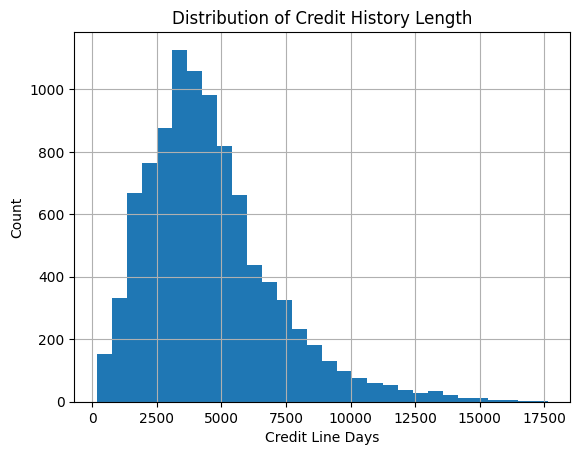

In [ ]:
# Assess the impact of credit history length on loan approval and repayment behavior

#Analyze the Distribution of Credit History Length
# Plot a histogram to visualize the distribution
import matplotlib.pyplot as plt
data['days.with.cr.line'].hist(bins=30)
plt.xlabel('Credit Line Days')
plt.ylabel('Count')
plt.title('Distribution of Credit History Length')
plt.show()

In [ ]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# Correlate Credit History Length with Loan Approval

# Group by approval status and calculate the average credit history length
approval_credit_length = data.groupby('loan_approved')['credit_line_days'].mean()

# Plot the average credit history length by approval status
approval_credit_length.plot(kind='bar')
plt.xlabel('Loan Approved')
plt.ylabel('Average Credit Line Days')
plt.title('Average Credit History Length by Loan Approval Status')
plt.show()

In [ ]:
# Correlate Credit History Length with Repayment Behavior

repayment_credit_length = data.groupby('repayment_status')['credit_line_days'].mean()

# Plot the average credit history length by repayment behavior
repayment_credit_length.plot(kind='bar')
plt.xlabel('Repayment Status')
plt.ylabel('Average Credit Line Days')
plt.title('Average Credit History Length by Repayment Behavior')
plt.show()

In [ ]:
# 9.	Revolving Balance (revol.bal):

Summary Statistics for Revolving Balances:
count    9.578000e+03
mean     1.691396e+04
std      3.375619e+04
min      0.000000e+00
25%      3.187000e+03
50%      8.596000e+03
75%      1.824950e+04
max      1.207359e+06
Name: revol.bal, dtype: float64


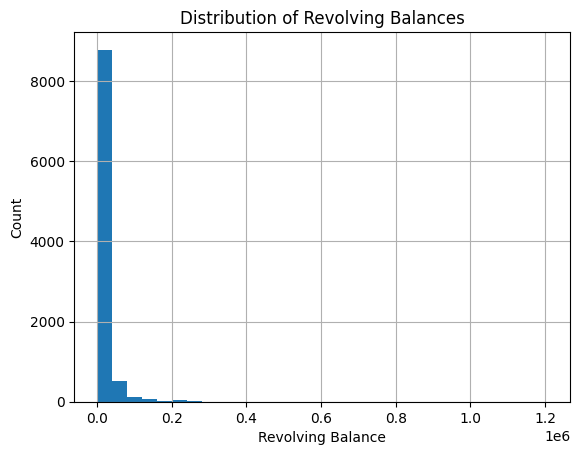

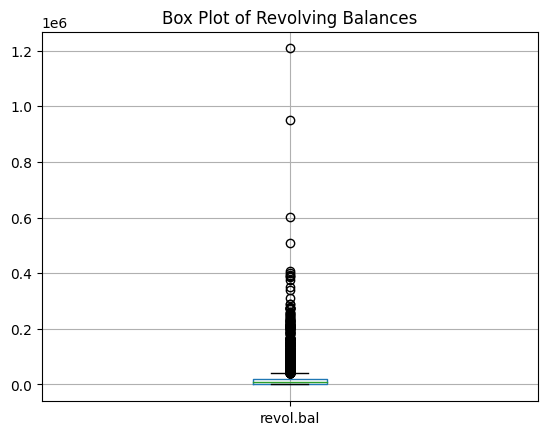

In [ ]:
# Analyze the distribution of revolving balances (amount unpaid at the end of the credit card billing cycle) among borrowers.

# Calculate summary statistics for revolving balances
revolving_balance_summary = data['revol.bal'].describe()

print("Summary Statistics for Revolving Balances:")
print(revolving_balance_summary)

# Plot a histogram to visualize the distribution of revolving balances
data['revol.bal'].hist(bins=30)  # Adjust the number of bins as needed
plt.xlabel('Revolving Balance')
plt.ylabel('Count')
plt.title('Distribution of Revolving Balances')
plt.show()

# Create a box plot to identify potential outliers
data.boxplot(column='revol.bal')
plt.title('Box Plot of Revolving Balances')
plt.show()

In [ ]:
# Investigate the relationship between revolving balances and loan default rates.

# Summary statistics for default rates
default_rate_summary = data['default_rate'].describe() if 'default_rate' in data.columns else None
print("Summary Statistics for Default Rates:")
print(default_rate_summary)

# Scatter plot of revolving balances vs. default status
data.plot.scatter(x='revol.bal', y='defaulted')  # Use your default column name
plt.xlabel('Revolving Balance')
plt.ylabel('Loan Default Status')
plt.title('Revolving Balances vs. Loan Default')
plt.show()

# Group by loan default status and calculate the mean revolving balance for each group
grouped_means = data.groupby('defaulted')['revolving_balance'].mean()

print("Mean Revolving Balance by Loan Default Status:")
print(grouped_means)

# Box plot to visualize the distribution of revolving balances within each group
data.boxplot(column='revolving_balance', by='defaulted')
plt.title('Revolving Balances by Loan Default Status')
plt.suptitle('')  # Remove default title to avoid double titles
plt.show()

# statistical test
# Separate defaulted and non-defaulted groups
defaulted = data[data['defaulted'] == 1]['revolving_balance']
non_defaulted = data[data['defaulted'] == 0]['revolving_balance']

# Perform a t-test to assess the statistical significance of the difference
t_stat, p_value = stats.ttest_ind(defaulted, non_defaulted)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

In [ ]:
# 10.	Revolving Line Utilization Rate (revol.util):

Summary Statistics for Revolving Line Utilization Rates:
count    9578.000000
mean       46.799236
std        29.014417
min         0.000000
25%        22.600000
50%        46.300000
75%        70.900000
max       119.000000
Name: revol.util, dtype: float64


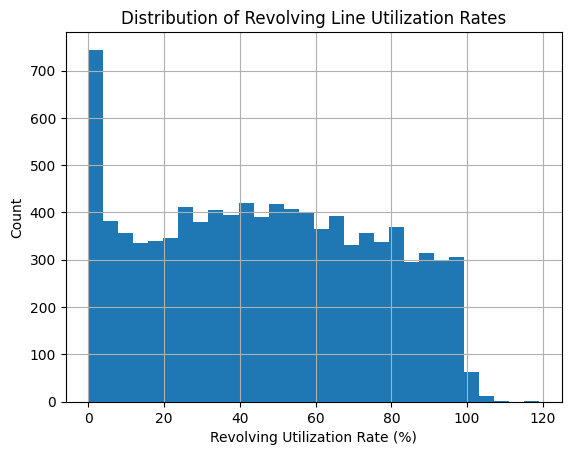

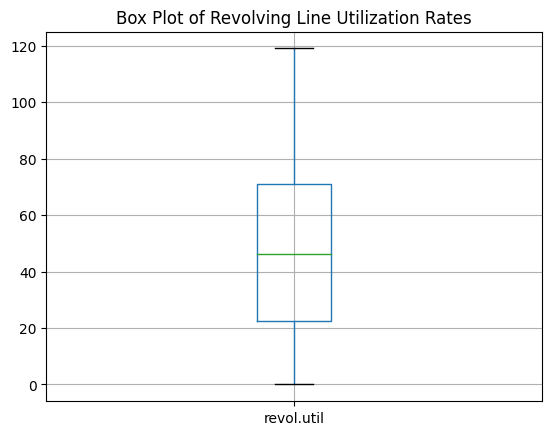

In [ ]:
# Examine the distribution of revolving line utilization rates (amount of credit line used relative to total credit available) among borrowers

# Summary statistics for revolving line utilization rates
revolving_utilization_summary = data['revol.util'].describe()

print("Summary Statistics for Revolving Line Utilization Rates:")
print(revolving_utilization_summary)

# Plot a histogram to visualize the distribution of revolving line utilization rates
data['revol.util'].hist(bins=30)  # Adjust the number of bins as needed
plt.xlabel('Revolving Utilization Rate (%)')
plt.ylabel('Count')
plt.title('Distribution of Revolving Line Utilization Rates')
plt.show()

# Create a box plot to identify potential outliers in the utilization rate
data.boxplot(column='revol.util')
plt.title('Box Plot of Revolving Line Utilization Rates')
plt.show()

In [ ]:
# Assess the impact of utilization rates on loan default rates.


In [ ]:
# 11.	Inquiries in the Last 6 Months (inq.last.6mths):

Summary Statistics for Credit Inquiries in the Last 6 Months:
count    9578.000000
mean        1.577469
std         2.200245
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        33.000000
Name: inq.last.6mths, dtype: float64


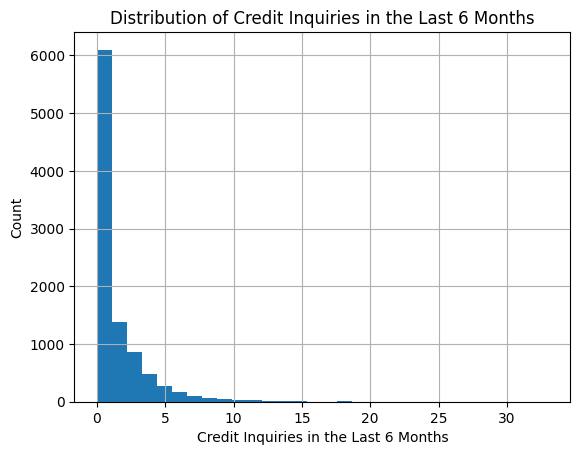

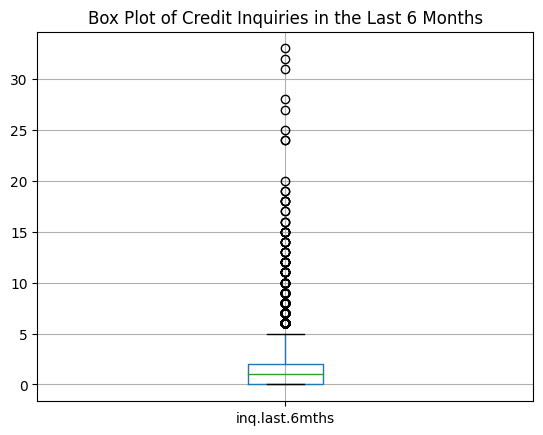

In [ ]:
# Analyze the distribution of inquiries by creditors in the last 6 months among borrowers

# Calculate summary statistics for credit inquiries in the last 6 months
inquiries_summary = data['inq.last.6mths'].describe()  # Adjust the column name as needed

print("Summary Statistics for Credit Inquiries in the Last 6 Months:")
print(inquiries_summary)

# Plot a histogram to visualize the distribution of credit inquiries
data['inq.last.6mths'].hist(bins=30)  # Adjust the number of bins for better visualization
plt.xlabel('Credit Inquiries in the Last 6 Months')
plt.ylabel('Count')
plt.title('Distribution of Credit Inquiries in the Last 6 Months')
plt.show()

# Create a box plot to identify potential outliers
data.boxplot(column='inq.last.6mths')
plt.title('Box Plot of Credit Inquiries in the Last 6 Months')
plt.show()

In [ ]:
# Investigate the relationship between recent credit inquiries and loan default rates

In [ ]:
# 12.	Delinquencies in the Last 2 Years (delinq.2yrs):

In [ ]:
# Examine the distribution of delinquencies (number of times the borrower had been 30+ days past due on a payment in the past 2 years) among borrowers.

# Calculate summary statistics for delinquencies in the past 2 years
delinquencies_summary = data['delinq.2yrs'].describe()

print("Summary Statistics for Delinquencies in the Past 2 Years:")
print(delinquencies_summary)

# Plot a histogram to visualize the distribution of delinquencies
data['delinq.2yrs'].hist(bins=20)
plt.xlabel('Number of Delinquencies (30+ Days Past Due) in the Past 2 Years')
plt.ylabel('Count')
plt.title('Distribution of Delinquencies in the Past 2 Years')
plt.show()

# Create a box plot to identify potential outliers
data.boxplot(column='delinq.2yrs')
plt.title('Box Plot of Delinquencies in the Past 2 Years')
plt.show()

Summary Statistics for Delinquencies in the Past 2 Years:
count    9578.000000
mean        0.163708
std         0.546215
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        13.000000
Name: delinq.2yrs, dtype: float64


In [ ]:
# Assess the impact of delinquencies on loan default rates.

In [ ]:
# 13.	Public Records (pub.rec):

Summary Statistics for Derogatory Public Records:
count    9578.000000
mean        0.062122
std         0.262126
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: pub.rec, dtype: float64


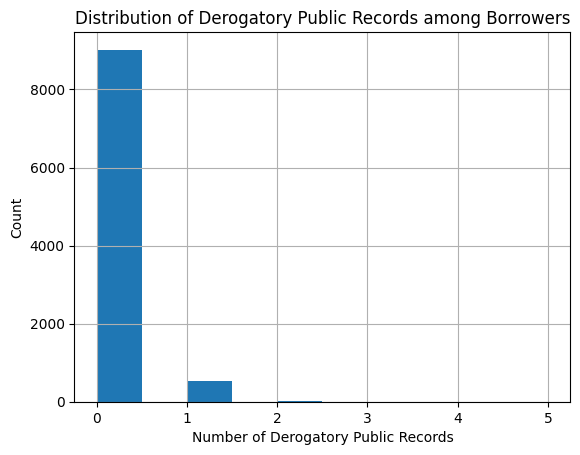

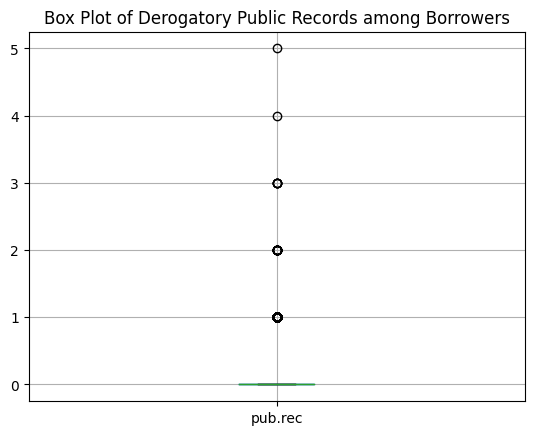

In [ ]:
# Analyze the distribution of derogatory public records (bankruptcy filings, tax liens, or judgments) among borrowers

public_records_summary = data['pub.rec'].describe()  # Adjust the column name if needed

print("Summary Statistics for Derogatory Public Records:")
print(public_records_summary)

# Plot a histogram to visualize the distribution of derogatory public records
data['pub.rec'].hist(bins=10)
plt.xlabel('Number of Derogatory Public Records')
plt.ylabel('Count')
plt.title('Distribution of Derogatory Public Records among Borrowers')
plt.show()

# Create a box plot to identify potential outliers
data.boxplot(column='pub.rec')
plt.title('Box Plot of Derogatory Public Records among Borrowers')
plt.show()

In [ ]:
# Investigate the relationship between public records and loan default rates.